<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2024-2025/Examens/202407_Repesca_Programacio%CC%81n_(Soluciones).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: Repesca (programació) 26/06/2024**

<hr>

**Nom:**

**NIU:**

**mail (gmail):**

<hr>

**"Instruccions d'edició del Notebook i lliurament"**

*   Obre el Notebook des de GitHub ("Open in Colab") i genera una còpia al teu Drive ("Guardar una còpia a Drive"). Editeu aquesta còpia per a l'examen.
*   Reanomena aquesta còpia utilitzant el teu NIU com a nom de fitxer: "NIU.ipynb" (*per exemple, 2055007.ipynb*).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre els comentaris/feedback sobre el teu examen) a la capçalera d'aquest Notebook.
*   Al final de l'examen, descarrega aquest Notebook en format .ipynb i l'has de pujar a la següent *drop folder*: [Link](https://cern.ch/examendf2024). Assegura't que el fitxer té el nom correcte.
*   Podeu tornar a pujar el fitxer si creieu que hi ha un error, però només considerarem l'última versió, i dins de l'horari establert.
*   **NOTA:** Abans d'entregar o donar per finalitzat cada exercici, és recomanable reiniciar l'entorn d'execució per veure que s'executa tot de manera correcta: "Entorn d'execució >> Reiniciar entorn d'execució", i després "Entorn d'execució >> Executar-ho tot".

<hr>

**Instruccions de l'examen**

*   L'examen es realitza de forma individual.
*   L'horari és de 9h a 12h. No s'acceptaran entregues passada aquesta hora.
*   Podeu consultar apunts, entregues o utilitzar internet per buscar informació, però **NO** comunicar-vos entre vosaltres/es, ni utilitzar ChatGPT, ni Whatsapp, ni missatgeria... Revisarem durant l'examen que no tingueu finestres obertes amb aquestes aplicacions.
*    **NOTA:** Tenim una eina per comparar Notebooks aplicant IA. Si hi ha còpies flagrants, obtindreu un cero, i us cridarem a revisió personalitzada.

<hr>

## **EXAMEN**

In [ ]:
# Executa aquesta part de codi per importar llibreries comunes (afegeix les que creguis necessàries a aquesta llista):

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats as ss

<font color='green'>**> Exercici #1 [3 punts]**</font>

Està plovent. El número de gotes que cau per $m^2$ i per segon segueix una distribució normal $[\mu=100,\sigma=10]$. El volum de cada gota, en $ml$ també segueix una distribució normal $[\mu=0.1,\sigma=0.01]$ $ml$.

Si posem una galleda que té un radi de $10$ $cm$, quan de temps haurem d'esperar per a obtenir 1 llitre d'aigua a la galleda?

El cálcul és fàcil, fent servir les mitjanes... no? En un segon cauen en 1 $m^2$ unes 100 gotes en promig. Fent servir el promig del volum per gota, en cada segon cauen per $m^2$ un volum de $100 \cdot 0.1 = 10$ $ml$. O sigui, que necessitem 100 segons per a tenir 1 llitre en 1 $m^2$. Ara bé, el cub té una àrea de $\pi*0.1^2$, o sigui que un $\pi$ % de les gotes cauen al cubell. Així doncs, hem d'escalar i obtenim un temps approximat de $3183.1$ segons per a tenir 1 llitre a la galleda.

**1.1 [1.5 punts]:** Anem a simular, en pasos de 1 segon, els $ml$ que van caient al cub. Quan arribis a un V que superi 1 llitre, calcula els segons que has trigat.

**Nota 1:** fes servir la distribució normal per a generar el número de gotes que cauen per segon, però les gotes són un número enter, així que fes servir la funció int()

**Nota 2:** pots posar el cub al centre del pla (x,y), és a dir, centrat a (0,0), i tirar gotes random entre [-0.5,0.5], tant en $x$ i en $y$, i anar comptant quantes van caient dins. Recorda que les gotes tenen una distribució de volum també!

Fes una funció que retorni els segons totals i el volum total (en ml) capturat al cub. Cada cop que crides aquesta funció obtens un valor de t diferent, ja que tenim una casuística probabilística. Recorda que obtens un valor de t que és un enter, és a dir: "en el segon 3125 tinc 1000.012 llitres al cub", per exemple.

In [ ]:
def Get_t():

  v_g_m = 0.1 # ml
  V_g_dev = 0.01 # ml
  N_g_s_m = 100
  N_g_s_d = 10
  r_cub = 0.1
  frac = np.pi*(r_cub**2)

  V=0
  t=1

  while (V <= 1000):
    N_g = int(ss.norm.rvs(loc=N_g_s_m,scale=N_g_s_d))

    x = np.random.uniform(low=-0.5, high=0.5, size=N_g)
    y = np.random.uniform(low=-0.5, high=0.5, size=N_g)

    v_g = ss.norm.rvs(loc=v_g_m,scale=V_g_dev,size=N_g)

    for j in range(len(x)):
      if x[j]**2 + y[j]**2 <= r_cubo**2:
        V+=v_g[j]
    t+=1

  return t, V

Get_t()

(3179, 1000.1253010216815)

**1.2 [1.5 punts]:** Fes 50 simulacions, i fes una distribució normalitzada tant dels valors de temps com els volums obtinguts. Posa a damunt de cada histograma una línea del valor esperat ($3183.1$ segons, $1000$ ml).

Imprimeix per pantalla els valors mitjans i el seu error ($std()/\sqrt{50}$), tant per al temps com per al volum. Com veus, els valors estan esbiaixats, ja que estem considerant intervals de temps que van creixen en +1 segons...

In [ ]:
N = 50

t_d = []
V_d = []

for i in range(N):
  t_d.append(Get_t()[0])
  V_d.append(Get_t()[1])

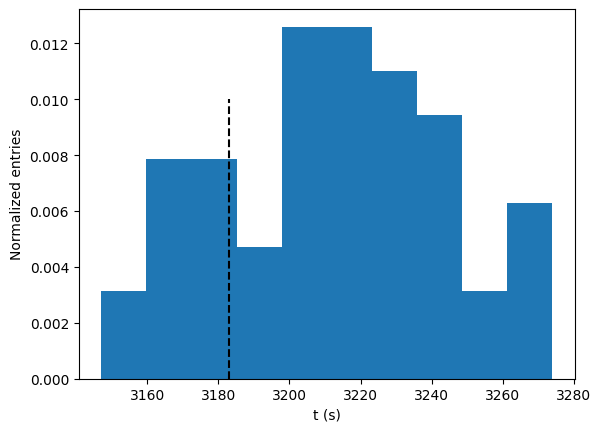

Temps (s)=  3211.84 4.453615160743012


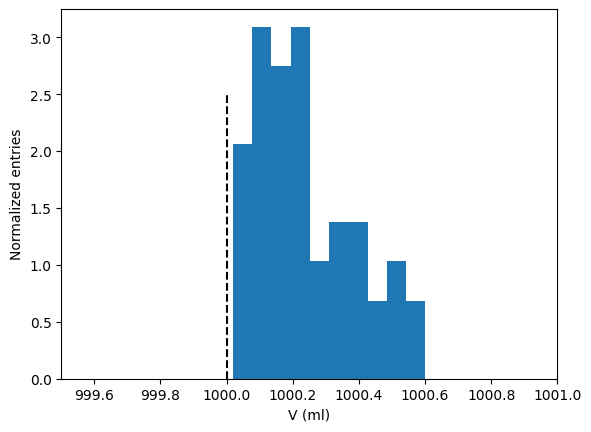

Volum (ml) =  1000.2395156570793 0.02198221339786152


In [ ]:
plt.hist(t_d, bins=10, density=True)
plt.xlabel("t (s)")
plt.ylabel("Normalized entries")
plt.vlines(x=3183.1, ymin=0, ymax=0.01, color='k', linestyle="--")
plt.show()

print("Temps (s)= ", np.mean(t_d), np.std(t_d)/np.sqrt(50))

plt.hist(V_d,bins=10, density=True)
plt.xlim(999.5,1001)
plt.xlabel("V (ml)")
plt.ylabel("Normalized entries")
plt.vlines(x=1000, ymin=0, ymax=2.5, color='k', linestyle="--")
plt.show()

print("Volum (ml) = ", np.mean(V_d), np.std(V_d)/np.sqrt(50))


<font color='green'>**> Exercici #2 [4 punts]**</font>

Anem a resoldre de forma numèrica la integral de $y(x)$:

$$
y(x) = e^{-x/10} \cdot \cos^2(x)
$$

a l'interval [0,25]. La integral analítica té com un valor de $I_{analítica} = 4.595685355693155$ (en unitats arbitràries).


**2.1 [1 punt]:** Dibuixa la funció y(x) en aquest interval.

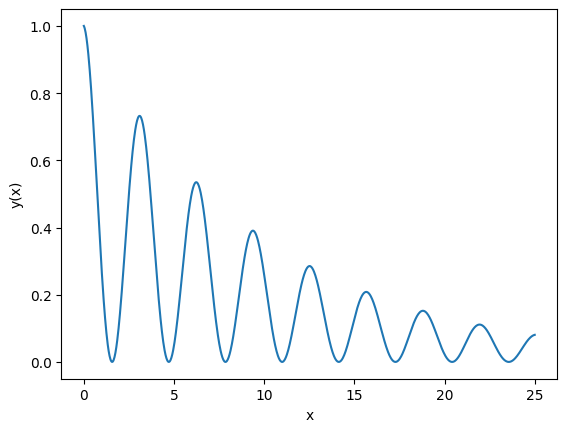

In [ ]:
def f(x):
  return np.exp(-1*x/10)*np.cos(x)**2

x=np.linspace(0,25,1000)
plt.plot(x,f(x))
plt.ylabel("y(x)")
plt.xlabel("x")
plt.show()

**2.2 [1.5 punts]:** Fixa't que la funció no existeix en tot l'interval, sino que té una envolvent $e^{-x/10}$, i tots els valors de $y(x)$ cauen per sota d'aquesta envolvent exponencial. Així doncs, en comptes de generar valors random en (x,y) per aplicar el mètode de MonteCarlo vist a classe, podem generar nombres aleatoris al pla (x,y) però que quedin per sota de la envolvent. De fet, sabem fer això, amb la funció cumulativa de la envolvent i un generador de números aleatoris entre 0 i 1. Aplicant el mètode de transformació, podem obtenir x's distribuïts segons la envolvent emprant:

$$
x_{tries} = -1*np.log(1-r)/.1
$$

on r són números aleatoris entre [0,1].

Procedeix de la següent manera:

*   Genera N=10000 $x_{tries}$.
*   Queda't amb aquells que estiguin entre [0,25].
*   Per a cadascú d'aquests $x_{tries}$, calcula el valor $y_{tries}$ aleatòriament, un valor comprès entre 0 i $y(x_{tries})$, per a cadascú dels valors de x considerats.
*   Dibuixa la envolvent i els parells de valors (x,y) generats. Verifica visualment que tots queden per sota de la envolvent, distribuits de forma uniforme en x i y.

789 valors de x>25


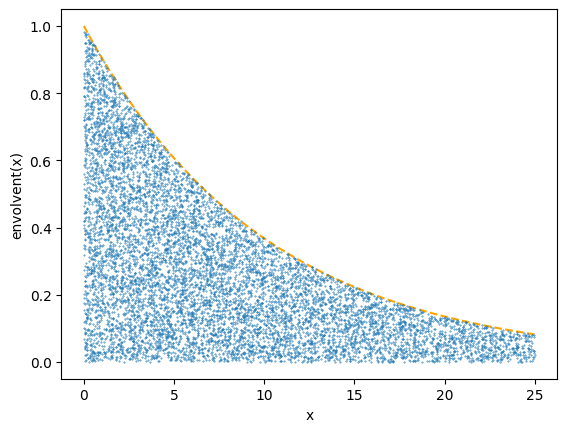

In [ ]:
def envolvent(x):
  return np.exp(-1*x/10)

N=10000
r = np.random.uniform(low=0, high=1, size=N)
x_tries = -10*np.log(1-r)

print(len(x_tries[x_tries>25]), "valors de x>25")

x_tries_g = x_tries[x_tries<=25]

y_tries_g = []

for x_t in x_tries_g:
  y_tries_g.append(np.random.uniform(0, envolvent(x_t)))

x=np.linspace(0,25,1000)
plt.plot(x,envolvent(x),'--',color='orange')
plt.plot(x_tries_g,y_tries_g,'.',markersize=.75)
plt.ylabel("envolvent(x)")
plt.xlabel("x")
plt.show()

**2.3 [1.25 punts]:** Si ara apliquem aquests valors aleatoris (x,y) sota la envolvent per a calcular la integral numèrica, convergirà molt més ràpid que si haguèssim fet servir tot el pla (x,y) entre [0,1] en $y$ i [0,25] en $x$, ja que molts punts caurien per sobre de la envolvent, i serien inútils per a calcular res, ja que sempre quedaríen rebutjats. Aquest mètode d'integració es diu **importance sampling**.

Calcula pels punts generats d'aquesta manera a la secció anterior, la integral numèrica de $y(x)$ amb aquest mètode MonteCarlo importance sampling. Pren nota que ara l'àrea on són els números aleatoris és la que queda per sota de la envolvent, que té una àrea de $A=9.179150013761012$ (en unitats arbitràries).

Dibuixa la funció $y(x)$, els valors acceptats en verd, i els rebutjats en vermell. Dona el valor de la integral que calcules, i l'error relatiu (en %) de integral numèrica de $y(x)$ a l'interval considerat, en comparació al valor analític.

Integral avaluada:  4.620115431819931
Integral analítica:  4.595685355693155
Error relatiu (%):  0.5315872222738581


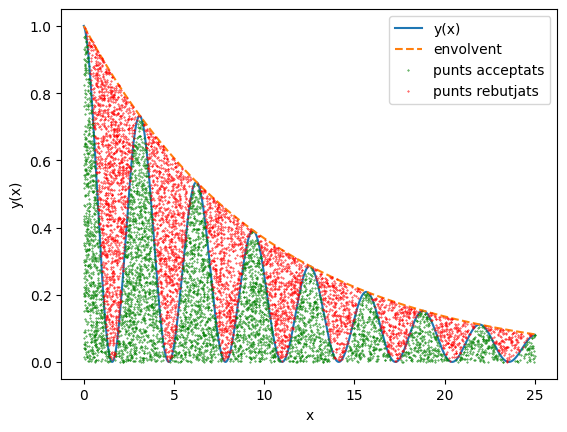

In [ ]:
x = np.linspace(0,25,10000)

y_tries_g = np.array(y_tries_g)

x_valid = x_tries_g[y_tries_g <= f(x_tries_g)]
y_valid = y_tries_g[y_tries_g <= f(x_tries_g)]

x_novalid = x_tries_g[y_tries_g > f(x_tries_g)]
y_novalid = y_tries_g[y_tries_g > f(x_tries_g)]

I_aval = 9.179150013761012*len(x_valid)/len(x_tries_g)
I_an = 4.595685355693155

print("Integral avaluada: ", I_aval)
print("Integral analítica: ", I_an)
print("Error relatiu (%): ", 100.*np.abs(I_aval-I_an)/I_an)

plt.plot(x,f(x),'-', label="y(x)")
plt.plot(x,envolvent(x),'--', label="envolvent")
plt.plot(x_valid,y_valid,'g.',markersize=.75, label="punts acceptats")
plt.plot(x_novalid,y_novalid,'r.',markersize=.75, label="punts rebutjats")
plt.ylabel("y(x)")
plt.xlabel("x")
plt.legend(loc='best')
plt.show()

**2.4 [0.25 punts]:** Quin error relatiu obtens per a un número similar de punts fent servir el mètode MC tradicional vist a classe considerant tota l'àrea que queda entre [0,1] en $y$ i [0,25] en $x$? (és aproximadament un factor 4 de diferència!).

In [ ]:
def compute_MC(N):
  x_tries = np.random.uniform(low=0, high=25, size=N)
  y_tries = np.random.uniform(low=0, high=1, size=N)

  x_valid = x_tries[np.abs(y_tries) <= f(x_tries)] # La condició de dins els [] retorna una llista de True o False, i actúa com una 'màscara'. Així ens quedem els elements de la llista que donen True a aquesta condició
  y_valid = y_tries[np.abs(y_tries) <= f(x_tries)]

  return 25*len(x_valid)/N

# Com a comparació, el mètode MC a l'àrea complerta pel mateix número de valors dona un error relatiu molt major

I_mc = compute_MC(len(x_tries_g))
print("Integral avaluada: ", I_mc)
print("Integral analítica: ", I_an)
print("Error relatiu (%): ", 100.*np.abs(I_mc-I_an)/I_an)

Integral avaluada:  4.502563543143886
Integral analítica:  4.595685355693155
Error relatiu (%):  2.026287818723489


<font color='green'>**> Exercici #3 [3 punts]**</font>

Hi ha moltes sèries convergents al número $\pi$. Anem a considerar aquestes dues sèries convergents, la sèrie de Gregory-Leibniz i el producte de Wallis, respectivament:

$$
\sum_{n=0}^{\infty} \frac{(-1)^n}{2n+1} = \frac{\pi}{4} \hspace{0.5 cm}\textbf{(Gregory-Leibniz)}
$$

$$
\prod_{n=0}^{\infty} \Big( \frac{2(n+1)}{2(n+1)-1} \cdot \frac{2(n+1)}{2(n+1)+1} \Big) = \frac{\pi}{2} \hspace{0.5 cm}\textbf{(Wallis)}
$$


**3.1 [1 punt]:** Fes dues funcions que, donat un número d'iteracions $m$, retorni una llista de tots els components evaluats a les sèries fins a n=0,1,2,3,4...,m, escalant adequadament perquè donin el número $\pi$. Per exemple:

```
def gregory_leibniz(m):
  # codi
  return llista

print(gregory_leibniz(3))
[4.0, 2.666666666666667, 3.466666666666667]
```

```
def wallis(n):
  #codi
  return llista

print(wallis(3))
[2.6666666666666665, 2.844444444444444, 2.9257142857142853]
```


In [ ]:
def gregory_leibniz(m):

  pi_gl = []

  for n in range(m):

    if n == 0:
      pi_gl.append(4*((-1)**n)/(2*n+1))
    else:
      pi_gl.append(4*((-1)**n)/(2*n+1) + pi_gl[-1])

  return pi_gl

def wallis(m):

  pi_w = []

  for n in range(m):

    if n == 0:
      pi_w.append( 2*((2*(n+1))/(2*(n+1)-1))*((2*(n+1))/(2*(n+1)+1)) )
    else:
      pi_w.append( ((2*(n+1))/(2*(n+1)-1))*((2*(n+1))/(2*(n+1)+1))*pi_w[-1])

  return pi_w

print(gregory_leibniz(3))
print(wallis(3))

[4.0, 2.666666666666667, 3.466666666666667]
[2.6666666666666665, 2.844444444444444, 2.9257142857142853]


**3.2 [1 punt]:** Fes una gràfica on mostris els valors de pi avaluats per a aquests dos mètodes en funció de m (escull m=100 com a límit), i posa una línea horitzontal al valor de $\pi$ com a referència.

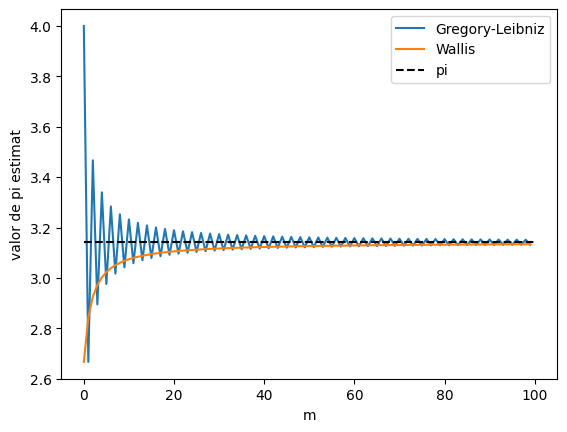

In [ ]:
M = 100
iter = np.arange(0,M,1)

pi_gl = gregory_leibniz(M)
pi_w = wallis(M)
plt.plot(iter,pi_gl, label="Gregory-Leibniz")
plt.plot(iter,pi_w, label="Wallis")
plt.hlines(y=np.pi,xmin=0,xmax=N,linestyle='--',color="k", label="pi")
plt.ylabel("valor de pi estimat")
plt.xlabel("m")
plt.legend(loc='best')
plt.show()

**3.3 [1 punt]:** Calcula l'error relatiu en funció de la iteració. Quin dels dos mètodes convergeix més ràpid al valor de pi? Al cap de 100 iteracions quin error relatiu obtens amb els dos mètodes?

Recorda que l'error relatiu en percentatge és:

$$
100*|\pi-\pi_{avaluat,m}|/\pi
$$

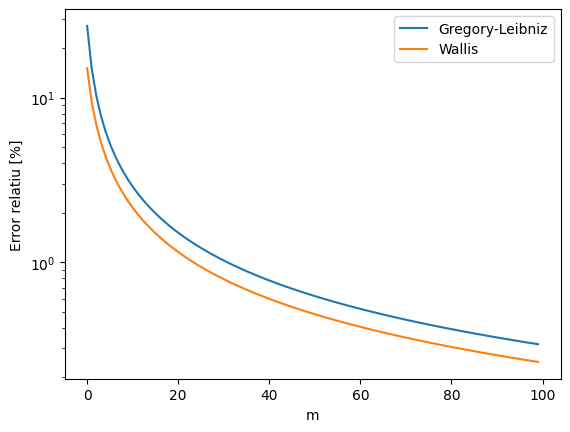

Error relatiu (%) Gregory-Leibniz per 100 iteracions:  0.31830192943101804 %
Error relatiu (%) Wallis per 100 iteracions:  0.24844605339637363 %


In [ ]:
eff_pi_gl = []
eff_pi_w = []

for n in range(M):
  eff_pi_gl.append(100.*np.abs(pi_gl[n]-np.pi)/np.pi)
  eff_pi_w.append(100.*np.abs(pi_w[n]-np.pi)/np.pi)

plt.plot(iter,eff_pi_gl, label="Gregory-Leibniz")
plt.plot(iter,eff_pi_w,label="Wallis")
plt.yscale('log')
plt.ylabel("Error relatiu [%]")
plt.xlabel("m")
plt.legend(loc='best')
plt.show()

print("Error relatiu (%) Gregory-Leibniz per 100 iteracions: ", eff_pi_gl[-1], "%")
print("Error relatiu (%) Wallis per 100 iteracions: ", eff_pi_w[-1], "%")